# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Приоритизация гипотез

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
print(hypothesis[['Reach', 'Impact', 'Confidence', 'Efforts']])
print('--------------------------------------')
hypothesis.info()

   Reach  Impact  Confidence  Efforts
0      3      10           8        6
1      2       5           4       10
2      8       3           7        3
3      8       3           3        8
4      3       1           1        1
5      3       2           2        3
6      5       3           8        3
7     10       7           8        5
8      1       9           9        5
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Применение фреймворка ICE

In [4]:
pd.set_option("max_colwidth", 120)

hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
print(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(1))

                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Способ **ICE** показал, что наиболее перспективными являются гипотезы под номером **8**, **0** и **7**. 

### Примененение фреймворка RICE

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
print(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

pd.reset_option("max_colwidth")

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Способ **RICE** показал, что наиболее перспективными являются гипотезы под номером **7**, **2**, **0** и **6**. В "лидеры" выбилась теория номер 7. Это связано с тем, что у гипотезы 7 параметр Reach равен 10, а у других гипотез он меньше.

## Анализ A/B теста

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
print(orders.head())
print('-------------------------------------------------------')
orders.info()

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
print(visitors.head())
print('-------------------------------------')
visitors.info()

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В обоих датафреймах столбец `date` имеет тип object, исправим это:

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
# Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [11]:
# Агрегируем значения и вычислим максимальную дату для orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),\
                                                                        axis=1).sort_values(by=['date','group'])

In [12]:
# Аналогично для visitors
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                        visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [13]:
# Объединяем кумулятивные данные
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


### График кумулятивной выручки по группам

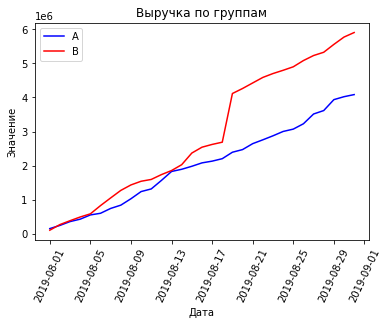

In [14]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='blue')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color='red')

plt.title('Выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=65)
plt.legend()
plt.show()

Выручка почти равномерно растет в теение всего теста. Однако, в группе B график в одной точке растет  очень резко. Причиной может быть всплеск числа заказов, либо появление очень дорогих заказов в выборке. 

### График среднего кумулятивного чека по группам

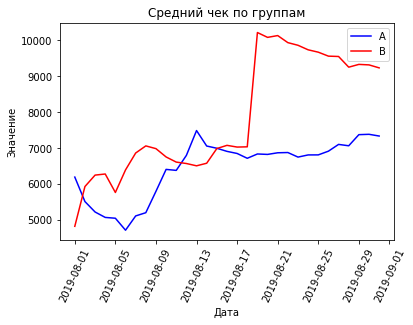

In [15]:
# Графики кумулятивного среднего чека по группам

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A', color='blue')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B', color='red')

plt.title('Средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=65)
plt.legend()
plt.show()

Средний чек становится равномерным у обеих групп только к самому концу теста. У группы A средний чек установился чуть раньше, чем у группы B, у которой, в свою очередь, также наблюдается резкий всплеск среднего чека в те же даты, что и всплеск выручки.

### График относительного изменения кумулятивного среднего чека группы B к A

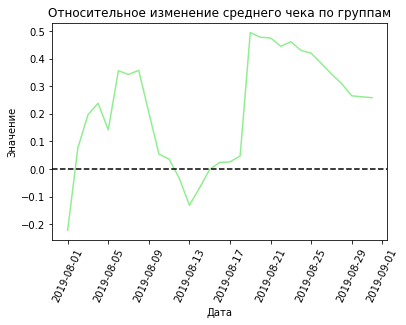

In [16]:
# Собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',\
                                                   how='left', suffixes=['A', 'B'])

# Строим график отношения средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /\
        (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])-1, color='lightgreen')

# Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=65)
plt.show()

Различие между сегментами в некоторых точках особо велико. В выборке явно присутствуют крупные заказы и выбросы, но группа В выглядит лучше группы А. В конце теста она лучше на **30%**.

### График кумулятивной конверсии по группам

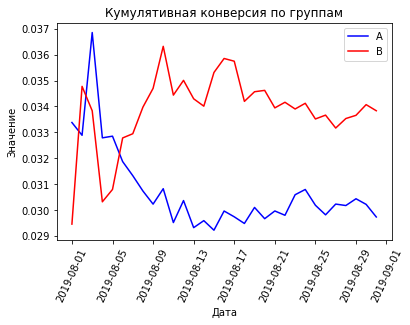

In [17]:
# Считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# Отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color='blue')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color='red')

plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=65)
plt.legend()

# Задаем масштаб осей
#plt.axis(['2019-08-01', '2019-09-01', 0, 0.040])
#Я убрал масштаб осей, т.к. вылезает неизвестная мне ошибка... интернет мне не помог.
#График при этом строился, но без масштабирования
#Прошу объяснить, что это за ошибка такая

plt.show()

График напоминает симметричный, но не является им. Конверсия группы А сильно просела, а группы В, наоборот, вырвалась вперед. По графику нельзя сказать, что конверсия одной из групп зафиксировалась.

### График относительного изменения кумулятивной конверсии группы B к группе A

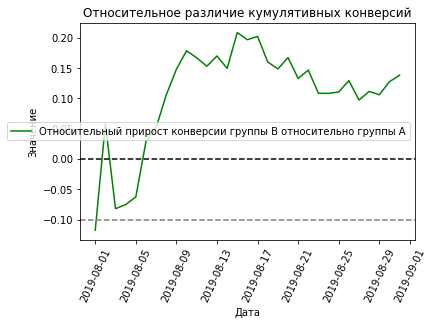

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / \
         mergedCumulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A", color='green')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Относительное различие кумулятивных конверсий')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=65)
plt.legend()
plt.show()

В начале теста группа В проигрывала группе А, но затем резко вырвалась вперед. После - немного упала, но продолжает расти. В общем, отношение конверсии еще довольно сильно скачет и не установилось окончательно, но группа В выглядит лучше группы А.

### Точеченый график количества заказов по пользователям

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


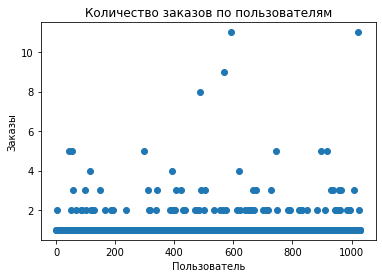

In [19]:
#Строим точечный график количества заказов по пользователям

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# Серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Заказы')
plt.show()

Подавляющее большинство пользователей сделало 1-2 заказа. Тех, кто сделал больше 2 заказов, значительно меньше. Посчитаем выборочные перцентили, чтобы узнать: 2 заказа это много или мало?

In [20]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей совершили больше двух заказов. И не более 1% пользователей - 4 и более заказов.

### Точечный график стоимостей заказов

Теперь построим точечный график стоимостей заказов:

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


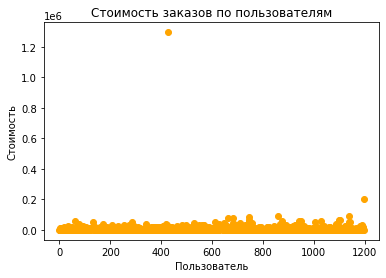

In [21]:
x_values = pd.Series(range(0, len(orders)))
print(orders.sort_values(by='revenue', ascending=False).head(10))
plt.scatter(x_values, orders['revenue'], color='orange')
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость')
plt.show()

В данных есть выбросы от 200 000 руб до 1,3 млн руб. Множество заказов не превышает 100 000 рублей. Чтобы разобраться подробнее, найдем выборочные перцентили:

In [22]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Как оказалось, только лишь не более чем у 1% заказов чек превышает 58 000 рублей. У 5% - превышает 28 000 рублей. Выберем границу аномальных заказов в **30 000 рублей**.

### Расчет статистической значимости различий в конверсии между группами по "сырым" данным

**Нулевая гипотеза**: статистически значимых различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Создадим таблицу data:

In [23]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              20           148579              20   
1 2019-08-02              19            93822              23   
2 2019-08-03              24           112473              16   
3 2019-08-04              15            70825              16   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  20               148579   
1           165531                  39               242401   
2           114248                  63               354874   
3           108571                  78               425699   
4            92428                 103               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  20               101217               719   
1                  43               266748               619   
2                  59               38

Таблица `data` имеет следующие столбцы:

- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами. Создадим переменные ordersByUsersA и ordersByUsersB со столбцами userId и orders. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [24]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

print(ordersByUsersA.head())
print('-------------------')
print(ordersByUsersB.head())

     userId  orders
0   8300375       1
1  11685486       1
2  54447517       1
3  66685450       1
4  78758296       1
-------------------
     userId  orders
0   5114589       1
1   6958315       1
2   8300375       1
3  39475350       1
4  47206413       1


Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [25]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()\
                                                       - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [26]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()\
                                                        - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()\
                                                        - len(ordersByUsersB['orders'])), name='orders')],axis=0)

В `sample` сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов переменной — это количество пользователей, сумма всех элементов — количество заказов.

Выведем показатель критерия Манна-Уитни и относительный прирост среднего числа заказов группы B:

In [27]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


**Отвергаем нулевую гипотезу.** Разница между числом заказов в группах есть. *(0.017 < p-value = 0.05)*.

Отностительный прирост среднего группы В к конверсии группы А равен **13,8%**.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке между сегментами.

**Нулевая гипотеза**: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [28]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                          orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. *(0.729 >> p-value = 0.05)*

При этом средний чек в группе В выше почти на **26%**.

Возможно, очистка от выбросов поможет сделать вывод.

### Расчет статистической значимости различий в конверсии между группами по "очищенным" данным

**Нулевая гипотеза**: статистически значимых различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Примем за аномальных пользователей тех, кто совершил от **4 заказов** или совершил заказ дороже **30000 рублей**.

In [29]:
#Делаем срезы данных без аномальных пользователей и объединяем в одну таблицу

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('-----------------')
print('Аномальных пользователей:', abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
-----------------
Аномальных пользователей: 57


Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Для этого подготовим выборки количества заказов по пользователям по группам теста:

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [31]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.018
0.148


Результаты по сравнению с "сырыми" данными практически не изменились. **Нулевую гипотезу отвергаем**. Относительный прирост среднего группы В к конверсии группы А равен **14,8%**.

Проверим различия в среднем чеке.

### Расчет статистической значимости различий в среднем чеке между группами по "очищенным" данным

**Нулевая гипотеза**: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [32]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.958
-0.020


Причин отвергать нулевую гипотезу нет. p-значение увеличилось, но разница между средними чеками стала незначительной: теперь в группе В он меньше на **2%**, чем в группе А.

### Выводы

- различие по среднему количеству заказов между группами есть и по «сырым» данным, и по данным после фильтрации аномалий;
- нет статистически значимого различия по среднему чеку между группами по данным после фильтрации аномалий, но до фильтрации разница была. Это связано с выбросами;
- график различия конверсии между группами сообщает, что результаты группы B лучше группы A пока не начинают ухудшаться;
- график различия среднего чека говорит о том, что результаты группы B лучше группы А, но, похоже, дело было в выбросах. Анализ "очищенных" данных показал, что особых различий в среднем чеке нет.

Исходя из имеющихся данных, можно сделать вывод и остановить тест. Вывод следующий: группа В лучше показывает себя по показателям конверсии, совершается больше покупок. Хоть средний чек у групп почти не отличается, в группе В, ко всему прочему, бывали особо крупные заказы.

**Есть вероятность, что сегмент В - лучше сегмента А.**